In [74]:
import uproot
import awkward as ak
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def load_data(filepath, channel_ids, max_events=1, first_event=0):
    """Load data from a ROOT file into a pandas DataFrame."""
    try:
        branch_names = [f"{ch:d}" for ch in channel_ids ]
        with uproot.open(filepath) as file:
            tree = file["triggerana/rawdigis_tree"]
            arrays = tree.arrays(branch_names, library="ak", entry_stop=max_events)
            df = ak.to_dataframe(arrays)
            df.columns = [int(c) for c in df.columns]
            df.index = np.arange(0, len(df))
            return df
        
    except Exception as e:
        print(f"Error loading data from {filepath}: {e}")
        return None

In [75]:
chan_per_tpc = 864
tpcs = [5,6]
chans = []
for tpc in tpcs:
    chans += list(range(chan_per_tpc*tpc, chan_per_tpc*(tpc+1)))
print(chans)
rawdigis = load_data("data/trigger_ana_tree_waves.root", chans)

[4320, 4321, 4322, 4323, 4324, 4325, 4326, 4327, 4328, 4329, 4330, 4331, 4332, 4333, 4334, 4335, 4336, 4337, 4338, 4339, 4340, 4341, 4342, 4343, 4344, 4345, 4346, 4347, 4348, 4349, 4350, 4351, 4352, 4353, 4354, 4355, 4356, 4357, 4358, 4359, 4360, 4361, 4362, 4363, 4364, 4365, 4366, 4367, 4368, 4369, 4370, 4371, 4372, 4373, 4374, 4375, 4376, 4377, 4378, 4379, 4380, 4381, 4382, 4383, 4384, 4385, 4386, 4387, 4388, 4389, 4390, 4391, 4392, 4393, 4394, 4395, 4396, 4397, 4398, 4399, 4400, 4401, 4402, 4403, 4404, 4405, 4406, 4407, 4408, 4409, 4410, 4411, 4412, 4413, 4414, 4415, 4416, 4417, 4418, 4419, 4420, 4421, 4422, 4423, 4424, 4425, 4426, 4427, 4428, 4429, 4430, 4431, 4432, 4433, 4434, 4435, 4436, 4437, 4438, 4439, 4440, 4441, 4442, 4443, 4444, 4445, 4446, 4447, 4448, 4449, 4450, 4451, 4452, 4453, 4454, 4455, 4456, 4457, 4458, 4459, 4460, 4461, 4462, 4463, 4464, 4465, 4466, 4467, 4468, 4469, 4470, 4471, 4472, 4473, 4474, 4475, 4476, 4477, 4478, 4479, 4480, 4481, 4482, 4483, 4484, 4485, 448

rawdigis = load_data("data/trigger_ana_tree_waves.root", [ c for c in range(0,864*6) ])

array([[<Axes: title={'center': '4320'}>,
        <Axes: title={'center': '4321'}>,
        <Axes: title={'center': '4322'}>,
        <Axes: title={'center': '4323'}>],
       [<Axes: title={'center': '4324'}>,
        <Axes: title={'center': '4325'}>,
        <Axes: title={'center': '4326'}>,
        <Axes: title={'center': '4327'}>],
       [<Axes: title={'center': '4328'}>,
        <Axes: title={'center': '4329'}>,
        <Axes: title={'center': '4330'}>,
        <Axes: title={'center': '4331'}>],
       [<Axes: title={'center': '4332'}>,
        <Axes: title={'center': '4333'}>,
        <Axes: title={'center': '4334'}>,
        <Axes: title={'center': '4335'}>],
       [<Axes: title={'center': '4336'}>,
        <Axes: title={'center': '4337'}>,
        <Axes: title={'center': '4338'}>,
        <Axes: title={'center': '4339'}>]], dtype=object)

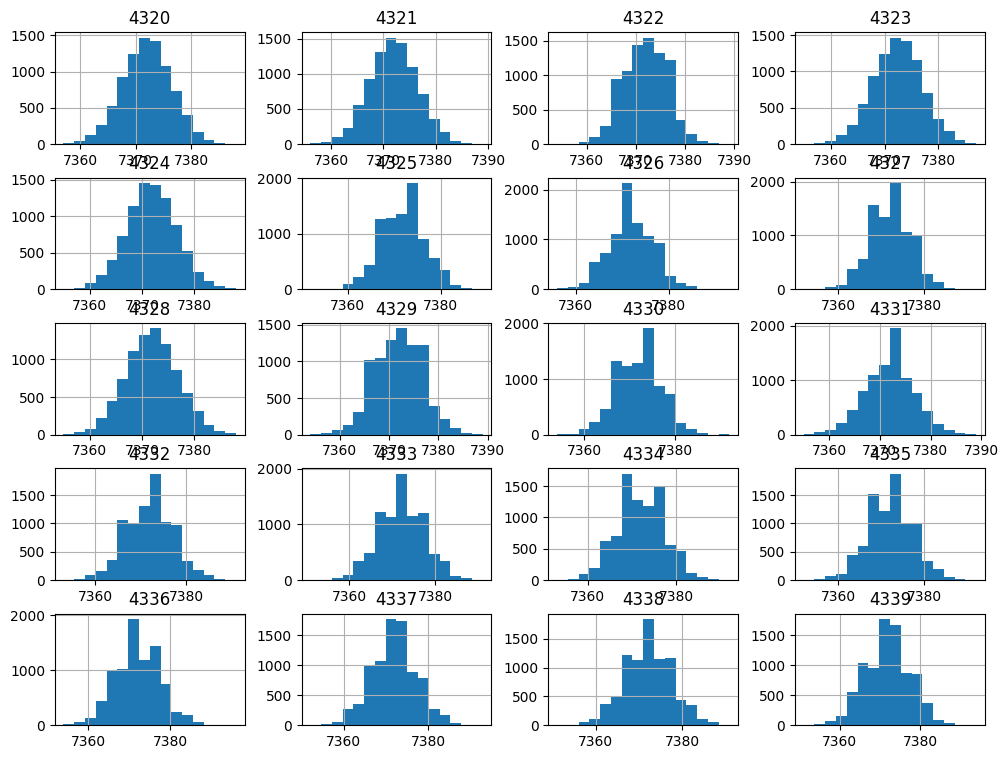

In [77]:
rawdigis[rawdigis.columns[:20]].hist(bins = 16, figsize=(12,9))

<Axes: >

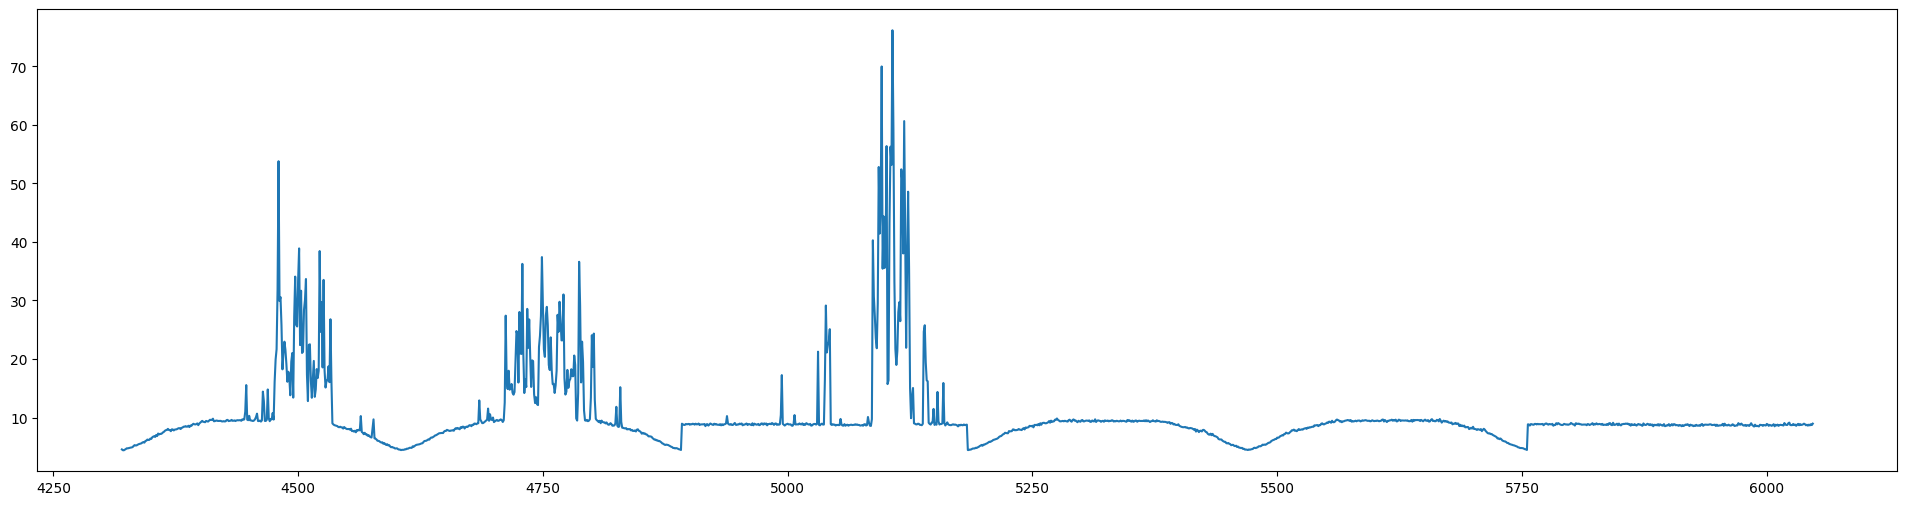

In [78]:
rawdigis.std().plot(figsize=(24,6))

<Axes: xlabel='entry,subentry'>

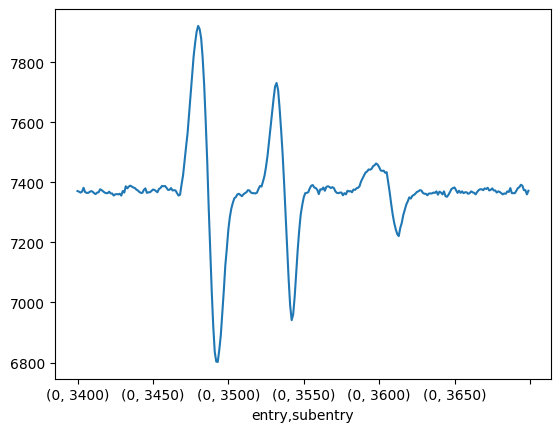

In [23]:
rawdigis[4750].iloc[3400:3700].plot()

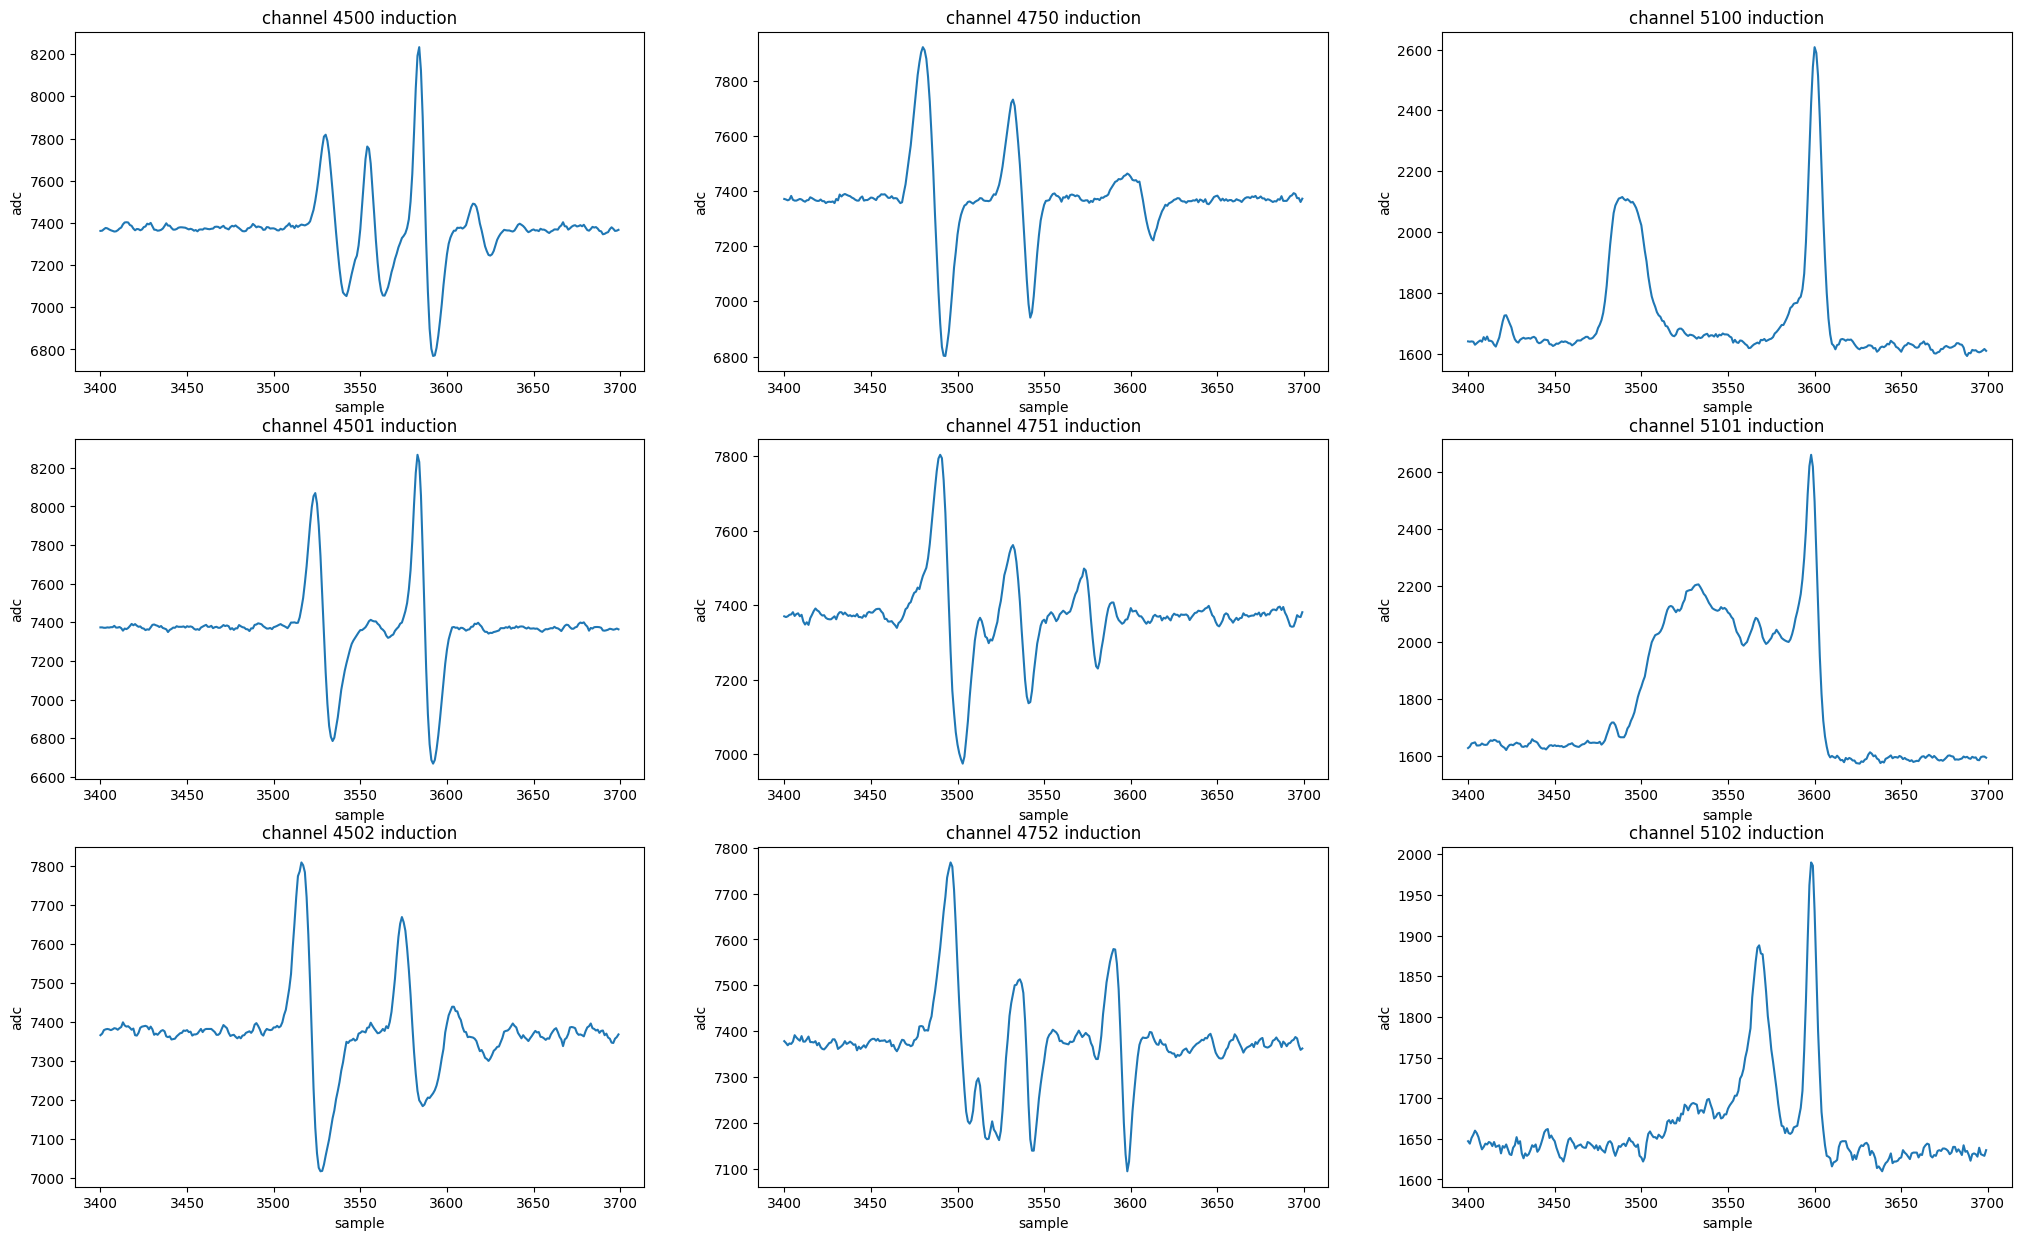

In [87]:
fig, ax = plt.subplots(3,3, figsize=(25,15), sharex = False, sharey= False)
rawdigis[4500].iloc[3400:3700].plot(ax=ax[0, 0], xlabel='sample', ylabel='adc', title='channel 4500 induction')
rawdigis[4750].iloc[3400:3700].plot(ax=ax[0, 1], xlabel='sample', ylabel='adc', title='channel 4750 induction')
rawdigis[5100].iloc[3400:3700].plot(ax=ax[0, 2], xlabel='sample', ylabel='adc', title='channel 5100 induction')


rawdigis[4501].iloc[3400:3700].plot(ax=ax[1, 0], xlabel='sample', ylabel='adc', title='channel 4501 induction')
rawdigis[4751].iloc[3400:3700].plot(ax=ax[1, 1], xlabel='sample', ylabel='adc', title='channel 4751 induction')
rawdigis[5101].iloc[3400:3700].plot(ax=ax[1, 2], xlabel='sample', ylabel='adc', title='channel 5101 induction')

rawdigis[4502].iloc[3400:3700].plot(ax=ax[2, 0], xlabel='sample', ylabel='adc', title='channel 4502 induction')
rawdigis[4752].iloc[3400:3700].plot(ax=ax[2, 1], xlabel='sample', ylabel='adc', title='channel 4752 induction')
rawdigis[5102].iloc[3400:3700].plot(ax=ax[2, 2], xlabel='sample', ylabel='adc', title='channel 5102 induction')

# plt.tight_layout()

plt.show()
